In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.DenseNet import DenseNet

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = DenseNet()

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 224, 224))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           3,136
              ReLU-2         [-1, 64, 224, 224]               0
       BatchNorm2d-3         [-1, 64, 224, 224]             128
            Conv2d-4         [-1, 32, 224, 224]          18,464
              ReLU-5         [-1, 32, 224, 224]               0
            Conv2d-6         [-1, 32, 224, 224]           9,248
              ReLU-7         [-1, 32, 224, 224]               0
              ReLU-8         [-1, 64, 224, 224]               0
            Conv2d-9         [-1, 32, 224, 224]          18,464
             ReLU-10         [-1, 32, 224, 224]               0
             ReLU-11         [-1, 96, 224, 224]               0
           Conv2d-12         [-1, 32, 224, 224]          27,680
             ReLU-13         [-1, 32, 224, 224]               0
             ReLU-14        [-1, 128, 2

In [5]:
standardTraining = StandardTraining(number_images=25000, 
                                     batch_size=10, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     image_width = 224,
                                     image_height = 224,
                                     use_positivity_weights=True,
                                     observation_min_count = 60,
                                     l2_reg=1e-4,
                                     loss_reduction='sum')

Total Oversampled Rows Added to Train: 9,352

Number of Training Images: 29,387
Number of Validation Images: 4,965

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     9.239373
Cardiomegaly                   5.194562
Lung_Opacity                   1.128876
Lung_Lesion                   10.656882
Edema                          2.902656
Consolidation                  7.011723
Pneumonia                     14.589920
Atelectasis                    3.643963
Pneumothorax                   7.393887
Pleural_Effusion               1.696550
Pleural_Other                 34.534462
Fracture                      10.097810
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 349731.7294         
Time of Completion: 2020-07-29 03:58:50.027487          
Training Duration: 0:11:45.552157          
Validation Duration: 0:00:44.545809

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.701096,0.324172,0.443348,0.785862,0.506430
4,Edema,7530,0.707968,0.441125,0.543564,0.771836,0.555000
5,Consolidation,3668,0.707470,0.287471,0.408822,0.797261,0.476740
7,Atelectasis,6328,0.636220,0.342726,0.445477,0.718578,0.477695
9,Pleural_Effusion,10898,0.697192,0.567354,0.625607,0.767010,0.668035



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.324627,0.245763,0.279743,0.693571,0.205210
4,Edema,1144,0.747378,0.355657,0.481962,0.729901,0.399095
5,Consolidation,283,0.130742,0.093199,0.108824,0.584937,0.077632
7,Atelectasis,758,0.224274,0.163776,0.189310,0.552119,0.174043
9,Pleural_Effusion,1675,0.655522,0.515009,0.576832,0.725838,0.555299


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 252957.5028         
Time of Completion: 2020-07-29 04:11:23.852758          
Training Duration: 0:11:48.467839          
Validation Duration: 0:00:45.094137

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.758853,0.419287,0.540135,0.870286,0.695796
4,Edema,7530,0.771049,0.517054,0.619010,0.847516,0.689925
5,Consolidation,3668,0.758451,0.396635,0.520876,0.880160,0.731221
7,Atelectasis,6328,0.690740,0.432944,0.532270,0.808990,0.663470
9,Pleural_Effusion,10898,0.761516,0.645134,0.698510,0.843421,0.774358



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.628731,0.198352,0.301566,0.712008,0.245530
4,Edema,1144,0.599650,0.415003,0.490526,0.744079,0.433282
5,Consolidation,283,0.339223,0.079404,0.128686,0.575103,0.071773
7,Atelectasis,758,0.402375,0.184179,0.252693,0.568132,0.181568
9,Pleural_Effusion,1675,0.568955,0.558944,0.563905,0.743875,0.577776


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 224665.2420         
Time of Completion: 2020-07-29 04:23:57.038675          
Training Duration: 0:11:48.942279          
Validation Duration: 0:00:43.983357

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.800169,0.464456,0.587753,0.897601,0.741074
4,Edema,7530,0.781673,0.537289,0.636841,0.867579,0.729572
5,Consolidation,3668,0.795256,0.446913,0.572241,0.910416,0.773579
7,Atelectasis,6328,0.716024,0.465625,0.564294,0.839639,0.705008
9,Pleural_Effusion,10898,0.780694,0.671296,0.721873,0.867732,0.811159



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.531716,0.230396,0.321489,0.727157,0.249534
4,Edema,1144,0.773601,0.351889,0.483739,0.733458,0.424096
5,Consolidation,283,0.388693,0.075239,0.126074,0.554899,0.070609
7,Atelectasis,758,0.407652,0.166308,0.236239,0.553228,0.171608
9,Pleural_Effusion,1675,0.719403,0.486869,0.580723,0.732072,0.570212


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 199652.7735         
Time of Completion: 2020-07-29 04:36:22.158672          
Training Duration: 0:11:40.842505          
Validation Duration: 0:00:44.019207

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.824199,0.501732,0.623754,0.917932,0.775829
4,Edema,7530,0.805843,0.568218,0.666484,0.886717,0.761853
5,Consolidation,3668,0.823064,0.482963,0.608731,0.929919,0.804315
7,Atelectasis,6328,0.744469,0.495061,0.594673,0.864035,0.739650
9,Pleural_Effusion,10898,0.802349,0.696234,0.745534,0.886725,0.835619



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.447761,0.243655,0.315582,0.725131,0.237115
4,Edema,1144,0.722902,0.359565,0.480256,0.731166,0.418759
5,Consolidation,283,0.236749,0.067608,0.105181,0.548550,0.067533
7,Atelectasis,758,0.328496,0.188779,0.239769,0.560171,0.178917
9,Pleural_Effusion,1675,0.688955,0.521464,0.593621,0.745048,0.578800


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 180716.9741         
Time of Completion: 2020-07-29 04:48:46.464493          
Training Duration: 0:11:40.123992          
Validation Duration: 0:00:43.925516

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.840641,0.527723,0.648403,0.934093,0.806526
4,Edema,7530,0.819788,0.595045,0.689567,0.902891,0.786627
5,Consolidation,3668,0.847874,0.518161,0.643226,0.944085,0.834044
7,Atelectasis,6328,0.762958,0.517915,0.616997,0.880723,0.760636
9,Pleural_Effusion,10898,0.813268,0.715046,0.761001,0.899294,0.852564



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.578358,0.205707,0.303475,0.707740,0.222093
4,Edema,1144,0.635490,0.379041,0.474853,0.725297,0.401802
5,Consolidation,283,0.332155,0.067870,0.112710,0.565817,0.067746
7,Atelectasis,758,0.311346,0.203448,0.246090,0.563415,0.184255
9,Pleural_Effusion,1675,0.725373,0.491306,0.585824,0.739279,0.580201


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 165838.9200         
Time of Completion: 2020-07-29 05:01:09.803871          
Training Duration: 0:11:39.049865          
Validation Duration: 0:00:44.034225

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.870152,0.569851,0.688689,0.946925,0.839039
4,Edema,7530,0.835591,0.615595,0.708918,0.913717,0.809256
5,Consolidation,3668,0.868593,0.550259,0.673715,0.956781,0.858365
7,Atelectasis,6328,0.789823,0.546409,0.645945,0.896710,0.785109
9,Pleural_Effusion,10898,0.827583,0.732478,0.777132,0.911698,0.869411



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.296642,0.271795,0.283675,0.707541,0.226025
4,Edema,1144,0.474650,0.418981,0.445082,0.732019,0.413573
5,Consolidation,283,0.222615,0.071510,0.108247,0.519638,0.063146
7,Atelectasis,758,0.341689,0.192996,0.246667,0.561232,0.188290
9,Pleural_Effusion,1675,0.558209,0.564614,0.561393,0.745737,0.590560


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 150501.5306         
Time of Completion: 2020-07-29 05:13:33.630939          
Training Duration: 0:11:39.463780          
Validation Duration: 0:00:44.110991

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.882167,0.590768,0.707643,0.954348,0.852598
4,Edema,7530,0.848074,0.633783,0.725435,0.924343,0.827897
5,Consolidation,3668,0.884951,0.588043,0.706574,0.964511,0.880523
7,Atelectasis,6328,0.807838,0.574899,0.671748,0.910627,0.805892
9,Pleural_Effusion,10898,0.839420,0.748977,0.791623,0.921329,0.883615



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.347015,0.244415,0.286816,0.704164,0.222493
4,Edema,1144,0.528846,0.408508,0.460952,0.730137,0.416092
5,Consolidation,283,0.265018,0.073746,0.115385,0.563369,0.071905
7,Atelectasis,758,0.337731,0.205293,0.255362,0.569583,0.185882
9,Pleural_Effusion,1675,0.675821,0.535985,0.597835,0.753186,0.589434


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 142931.3026         
Time of Completion: 2020-07-29 05:25:56.615268          
Training Duration: 0:11:38.665920          
Validation Duration: 0:00:44.064112

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.890388,0.615474,0.727837,0.959927,0.865868
4,Edema,7530,0.855644,0.646174,0.736301,0.928792,0.837726
5,Consolidation,3668,0.901854,0.604422,0.723772,0.969142,0.893085
7,Atelectasis,6328,0.822535,0.585094,0.683789,0.919506,0.816242
9,Pleural_Effusion,10898,0.850890,0.761580,0.803762,0.928130,0.892193



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.513060,0.211214,0.299238,0.702779,0.222084
4,Edema,1144,0.405594,0.395230,0.400345,0.699765,0.372265
5,Consolidation,283,0.346290,0.068627,0.114553,0.548233,0.068640
7,Atelectasis,758,0.221636,0.188764,0.203883,0.549527,0.175769
9,Pleural_Effusion,1675,0.609552,0.532325,0.568327,0.730519,0.557246


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 137067.0636         
Time of Completion: 2020-07-29 05:38:19.275463          
Training Duration: 0:11:38.256024          
Validation Duration: 0:00:44.149874

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.899874,0.625953,0.738326,0.962871,0.877413
4,Edema,7530,0.870252,0.670452,0.757397,0.938004,0.856379
5,Consolidation,3668,0.902126,0.609280,0.727333,0.970757,0.895686
7,Atelectasis,6328,0.831226,0.600525,0.697289,0.924196,0.826618
9,Pleural_Effusion,10898,0.854469,0.769969,0.810021,0.932611,0.898501



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.305970,0.267974,0.285714,0.700452,0.224422
4,Edema,1144,0.323427,0.412027,0.362390,0.699030,0.375133
5,Consolidation,283,0.137809,0.072626,0.095122,0.545183,0.067478
7,Atelectasis,758,0.312665,0.191283,0.237356,0.563882,0.180221
9,Pleural_Effusion,1675,0.465075,0.578752,0.515723,0.729312,0.561198


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 134248.0798         
Time of Completion: 2020-07-29 05:50:41.686304          
Training Duration: 0:11:38.124363          
Validation Duration: 0:00:44.033178

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.903035,0.637310,0.747253,0.965683,0.886967
4,Edema,7530,0.871713,0.676701,0.761927,0.940825,0.859207
5,Consolidation,3668,0.902126,0.627418,0.740103,0.970665,0.900394
7,Atelectasis,6328,0.844501,0.613618,0.710780,0.930910,0.837634
9,Pleural_Effusion,10898,0.863002,0.777980,0.818289,0.936767,0.903400



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.464552,0.219577,0.298204,0.711133,0.224051
4,Edema,1144,0.555070,0.376855,0.448922,0.705307,0.387082
5,Consolidation,283,0.250883,0.075774,0.116393,0.549039,0.068020
7,Atelectasis,758,0.361478,0.183033,0.243016,0.559311,0.176127
9,Pleural_Effusion,1675,0.517612,0.563719,0.539683,0.733773,0.569493


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 127541.8902         
Time of Completion: 2020-07-29 06:03:04.339546          
Training Duration: 0:11:38.290925          
Validation Duration: 0:00:44.108996

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.912521,0.654521,0.762282,0.968631,0.891003
4,Edema,7530,0.880478,0.681608,0.768384,0.943242,0.864944
5,Consolidation,3668,0.917939,0.639992,0.754172,0.976268,0.911163
7,Atelectasis,6328,0.852244,0.626001,0.721810,0.936522,0.847448
9,Pleural_Effusion,10898,0.870618,0.787386,0.826913,0.940612,0.907849



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.412313,0.230448,0.295652,0.708521,0.226868
4,Edema,1144,0.472902,0.379649,0.421176,0.703889,0.387104
5,Consolidation,283,0.077739,0.061281,0.068536,0.539899,0.064026
7,Atelectasis,758,0.226913,0.211043,0.218690,0.565905,0.185224
9,Pleural_Effusion,1675,0.511045,0.571810,0.539723,0.735640,0.571199


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 124658.9862         
Time of Completion: 2020-07-29 06:15:26.360447          
Training Duration: 0:11:37.666594          
Validation Duration: 0:00:44.105003

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.918634,0.665648,0.771942,0.970408,0.892810
4,Edema,7530,0.879416,0.688787,0.772515,0.945488,0.870318
5,Consolidation,3668,0.922028,0.655172,0.766025,0.977098,0.917456
7,Atelectasis,6328,0.863306,0.638947,0.734373,0.941082,0.856523
9,Pleural_Effusion,10898,0.871811,0.793867,0.831015,0.943410,0.913094



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.261194,0.260708,0.260951,0.716180,0.223897
4,Edema,1144,0.515734,0.389182,0.443609,0.703338,0.383641
5,Consolidation,283,0.219081,0.066098,0.101556,0.528075,0.064336
7,Atelectasis,758,0.358839,0.199267,0.256241,0.574356,0.192028
9,Pleural_Effusion,1675,0.555224,0.553242,0.554231,0.740804,0.571067


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 120467.3228         
Time of Completion: 2020-07-29 06:27:47.892665          
Training Duration: 0:11:37.453166          
Validation Duration: 0:00:43.827748

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.919266,0.672994,0.777085,0.972577,0.902718
4,Edema,7530,0.885126,0.698930,0.781085,0.948259,0.875482
5,Consolidation,3668,0.922028,0.654538,0.765591,0.977083,0.914302
7,Atelectasis,6328,0.860303,0.643879,0.736522,0.942102,0.859241
9,Pleural_Effusion,10898,0.874381,0.793356,0.831900,0.945366,0.915386



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.373134,0.238095,0.290698,0.703201,0.219928
4,Edema,1144,0.666084,0.349702,0.458622,0.706488,0.389239
5,Consolidation,283,0.067138,0.060703,0.063758,0.529240,0.064379
7,Atelectasis,758,0.275726,0.206318,0.236025,0.566875,0.186296
9,Pleural_Effusion,1675,0.511045,0.558747,0.533832,0.724330,0.557096


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 117148.7341         
Time of Completion: 2020-07-29 06:40:07.157915          
Training Duration: 0:11:35.098465          
Validation Duration: 0:00:43.914489

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.920320,0.679216,0.781597,0.973545,0.906214
4,Edema,7530,0.890438,0.704751,0.786787,0.951582,0.882717
5,Consolidation,3668,0.929117,0.670206,0.778704,0.979632,0.921714
7,Atelectasis,6328,0.862990,0.649114,0.740927,0.944423,0.860290
9,Pleural_Effusion,10898,0.879336,0.802395,0.839105,0.948560,0.919107



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.432836,0.246023,0.313725,0.699969,0.219788
4,Edema,1144,0.517483,0.380463,0.438519,0.699657,0.387333
5,Consolidation,283,0.123675,0.096419,0.108359,0.525060,0.065825
7,Atelectasis,758,0.317942,0.203033,0.247815,0.579569,0.190090
9,Pleural_Effusion,1675,0.620896,0.527383,0.570332,0.735332,0.569970


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 115775.1089         
Time of Completion: 2020-07-29 06:52:26.292576          
Training Duration: 0:11:35.025661          
Validation Duration: 0:00:43.858670

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.922007,0.684400,0.785631,0.973966,0.907727
4,Edema,7530,0.895352,0.712760,0.793690,0.954010,0.887996
5,Consolidation,3668,0.927754,0.673995,0.780773,0.981028,0.924384
7,Atelectasis,6328,0.875474,0.661651,0.753690,0.947985,0.869621
9,Pleural_Effusion,10898,0.884382,0.809168,0.845105,0.951040,0.923781



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.367537,0.242015,0.291852,0.699995,0.216495
4,Edema,1144,0.449301,0.409236,0.428333,0.708153,0.393013
5,Consolidation,283,0.109541,0.063786,0.080624,0.530692,0.064471
7,Atelectasis,758,0.327177,0.194969,0.244335,0.578971,0.188723
9,Pleural_Effusion,1675,0.540299,0.565979,0.552841,0.738298,0.567638


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 110340.1449         
Time of Completion: 2020-07-29 07:04:45.782299          
Training Duration: 0:11:35.276018          
Validation Duration: 0:00:43.961414

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.933179,0.706286,0.804032,0.977020,0.917736
4,Edema,7530,0.894954,0.717144,0.796243,0.954303,0.887670
5,Consolidation,3668,0.931025,0.690597,0.792987,0.981488,0.930724
7,Atelectasis,6328,0.878635,0.670283,0.760446,0.950377,0.873843
9,Pleural_Effusion,10898,0.888328,0.814899,0.850031,0.954150,0.927426



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.358209,0.242424,0.289157,0.707935,0.225222
4,Edema,1144,0.555070,0.365362,0.440666,0.694427,0.379056
5,Consolidation,283,0.141343,0.062305,0.086486,0.512465,0.060203
7,Atelectasis,758,0.358839,0.184032,0.243292,0.571564,0.185781
9,Pleural_Effusion,1675,0.599403,0.520207,0.557004,0.726196,0.556358


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 108988.1354         
Time of Completion: 2020-07-29 07:17:05.352739          
Training Duration: 0:11:35.325828          
Validation Duration: 0:00:43.993307

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.931282,0.707106,0.803857,0.977687,0.918220
4,Edema,7530,0.901859,0.730294,0.807059,0.957876,0.896059
5,Consolidation,3668,0.937296,0.696798,0.799349,0.982646,0.934583
7,Atelectasis,6328,0.881163,0.680000,0.767621,0.954100,0.883886
9,Pleural_Effusion,10898,0.891815,0.822181,0.855583,0.955681,0.930406



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.268657,0.244898,0.256228,0.702330,0.218595
4,Edema,1144,0.475524,0.393632,0.430721,0.710024,0.392682
5,Consolidation,283,0.113074,0.058716,0.077295,0.529850,0.062057
7,Atelectasis,758,0.321900,0.186402,0.236091,0.566226,0.187169
9,Pleural_Effusion,1675,0.622687,0.531871,0.573707,0.737199,0.570149


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 106397.5651         
Time of Completion: 2020-07-29 07:29:25.360054          
Training Duration: 0:11:35.734756          
Validation Duration: 0:00:44.019238

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.931071,0.708534,0.804700,0.977717,0.921129
4,Edema,7530,0.909296,0.738301,0.814925,0.959872,0.899887
5,Consolidation,3668,0.939477,0.705280,0.805705,0.984155,0.938009
7,Atelectasis,6328,0.891909,0.690989,0.778698,0.956726,0.888249
9,Pleural_Effusion,10898,0.892274,0.820245,0.854744,0.955825,0.930074



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.337687,0.238786,0.279753,0.703830,0.222114
4,Edema,1144,0.540210,0.379840,0.446048,0.700675,0.383037
5,Consolidation,283,0.106007,0.058594,0.075472,0.522960,0.062789
7,Atelectasis,758,0.254617,0.192231,0.219069,0.566354,0.187150
9,Pleural_Effusion,1675,0.601791,0.513761,0.554303,0.723112,0.558004


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 105004.8679         
Time of Completion: 2020-07-29 07:41:44.872674          
Training Duration: 0:11:35.247066          
Validation Duration: 0:00:44.010260

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.931282,0.709377,0.805323,0.978777,0.921164
4,Edema,7530,0.905312,0.738650,0.813533,0.959837,0.901291
5,Consolidation,3668,0.939749,0.708094,0.807638,0.985698,0.938585
7,Atelectasis,6328,0.892383,0.690765,0.778735,0.957346,0.888560
9,Pleural_Effusion,10898,0.894476,0.826382,0.859082,0.958104,0.934183



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.283582,0.269027,0.276113,0.711486,0.225396
4,Edema,1144,0.550699,0.365217,0.439177,0.699428,0.384892
5,Consolidation,283,0.063604,0.072000,0.067542,0.517315,0.062009
7,Atelectasis,758,0.196570,0.195282,0.195924,0.570577,0.192462
9,Pleural_Effusion,1675,0.560597,0.546566,0.553492,0.737962,0.564723


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 105814.4313         
Time of Completion: 2020-07-29 07:54:04.899915          
Training Duration: 0:11:35.625034          
Validation Duration: 0:00:44.150907

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,4744,0.933179,0.718902,0.812145,0.978289,0.924161
4,Edema,7530,0.902258,0.740813,0.813604,0.961740,0.904580
5,Consolidation,3668,0.934024,0.696908,0.798229,0.983018,0.934882
7,Atelectasis,6328,0.887958,0.684659,0.773168,0.954547,0.887215
9,Pleural_Effusion,10898,0.898881,0.830240,0.863198,0.958940,0.935730



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,536,0.335821,0.243572,0.282353,0.707020,0.219272
4,Edema,1144,0.494755,0.387671,0.434716,0.707596,0.388170
5,Consolidation,283,0.091873,0.074074,0.082019,0.527386,0.064072
7,Atelectasis,758,0.279683,0.200378,0.233480,0.573399,0.190638
9,Pleural_Effusion,1675,0.491940,0.582332,0.533333,0.742768,0.573519


Training Duration: 4:07:45.221699



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.556879
Hamming Loss,0.073851
Combined Recall,0.766922
Combined Precision,0.684716
Combined F1,0.704991


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,2870,0.939373,0.649795,0.768201,0.983194,0.928472
1,Cardiomegaly,4744,0.933179,0.718902,0.812145,0.978289,0.924161
2,Lung_Opacity,13804,0.850478,0.831975,0.841125,0.925297,0.917485
3,Lung_Lesion,2521,0.945656,0.651544,0.771521,0.988496,0.938324
4,Edema,7530,0.902258,0.740813,0.813604,0.961740,0.904580
5,Consolidation,3668,0.934024,0.696908,0.798229,0.983018,0.934882
6,Pneumonia,1885,0.952785,0.626439,0.755892,0.989155,0.942223
7,Atelectasis,6328,0.887958,0.684659,0.773168,0.954547,0.887215
8,Pneumothorax,3501,0.931163,0.662602,0.774255,0.980726,0.916812
9,Pleural_Effusion,10898,0.898881,0.830240,0.863198,0.958940,0.935730


***** ROC *****


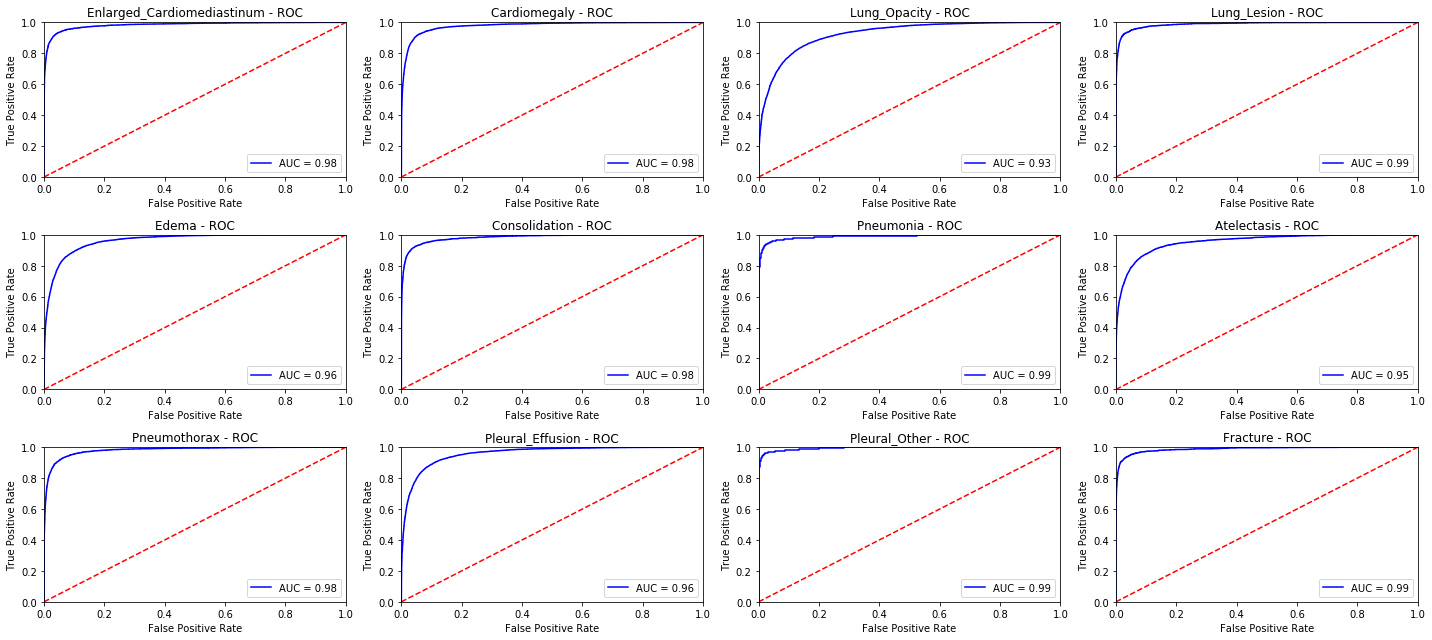

***** Precision / Recall *****


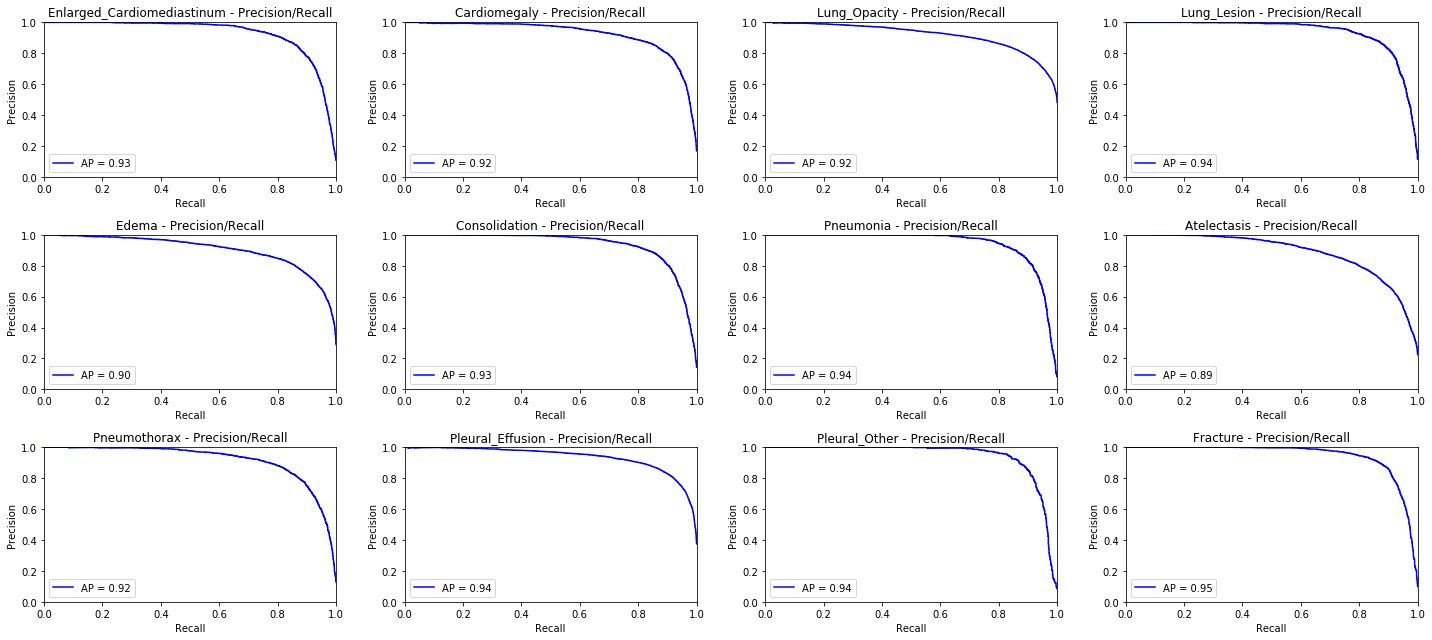


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.102518
Hamming Loss,0.179624
Combined Recall,0.310450
Combined Precision,0.276035
Combined F1,0.266922


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,243,0.086420,0.079245,0.082677,0.543013,0.066470
1,Cardiomegaly,536,0.335821,0.243572,0.282353,0.707020,0.219272
2,Lung_Opacity,2232,0.525986,0.528353,0.527167,0.607674,0.539059
3,Lung_Lesion,207,0.111111,0.064067,0.081272,0.589280,0.061946
4,Edema,1144,0.494755,0.387671,0.434716,0.707596,0.388170
5,Consolidation,283,0.091873,0.074074,0.082019,0.527386,0.064072
6,Pneumonia,111,0.126126,0.051661,0.073298,0.584891,0.035720
7,Atelectasis,758,0.279683,0.200378,0.233480,0.573399,0.190638
8,Pneumothorax,414,0.227053,0.162069,0.189135,0.642662,0.142684
9,Pleural_Effusion,1675,0.491940,0.582332,0.533333,0.742768,0.573519


***** ROC *****


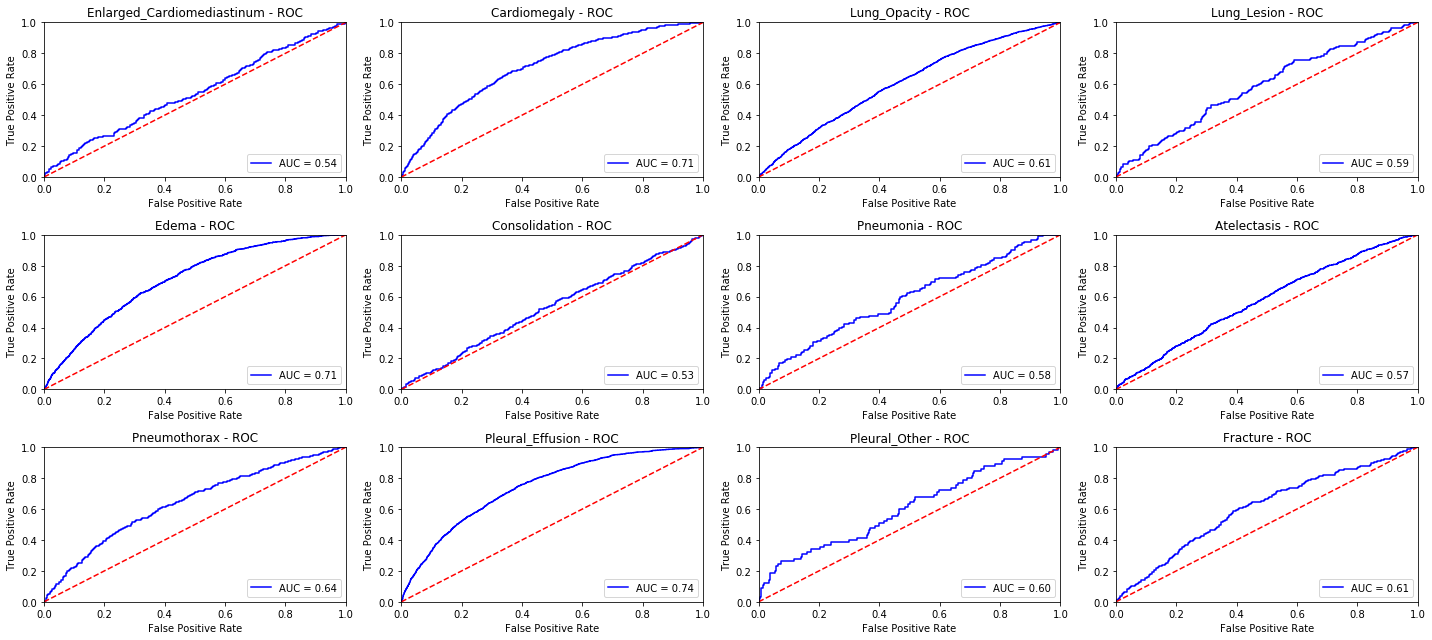

***** Precision / Recall *****


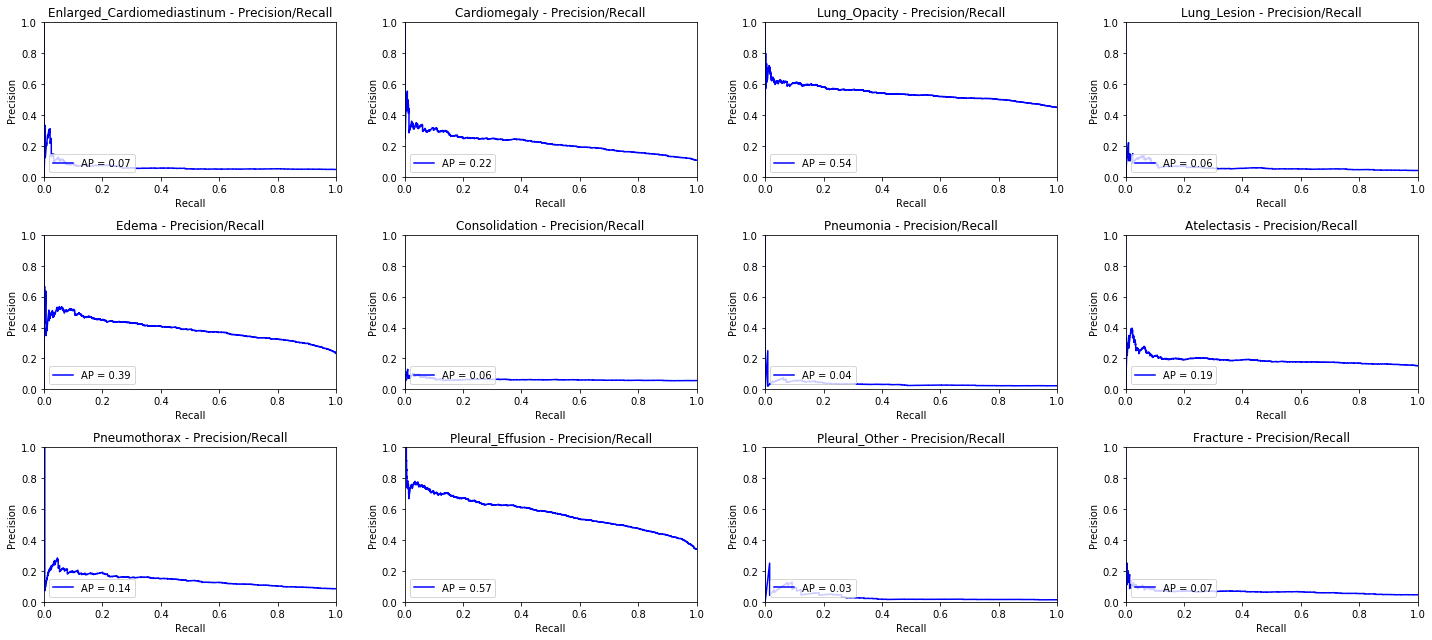

In [7]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


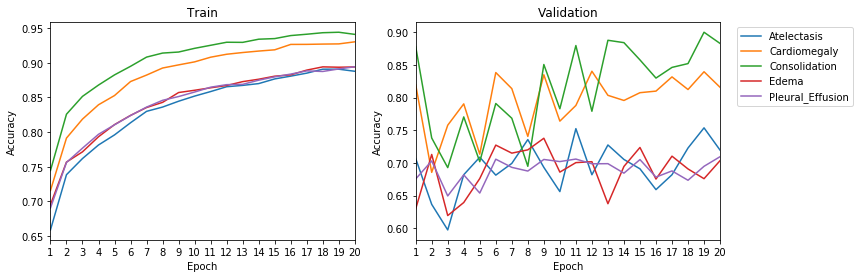


RECALL

▔▔▔


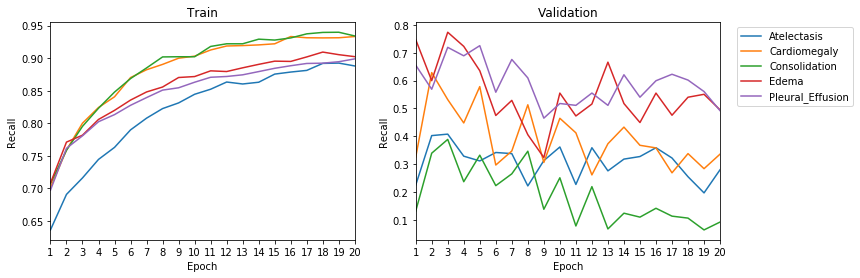


PRECISION

▔▔▔▔▔▔


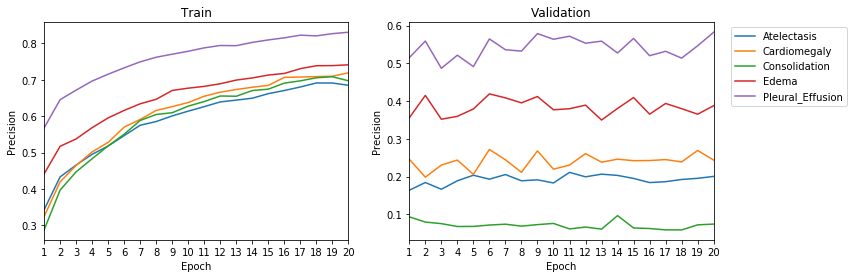


F1

▔


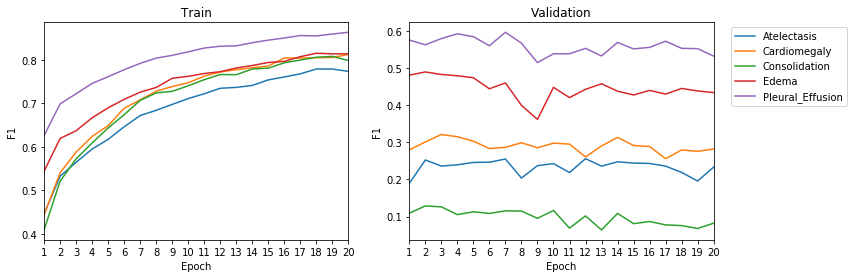


ROC AUC

▔▔▔▔


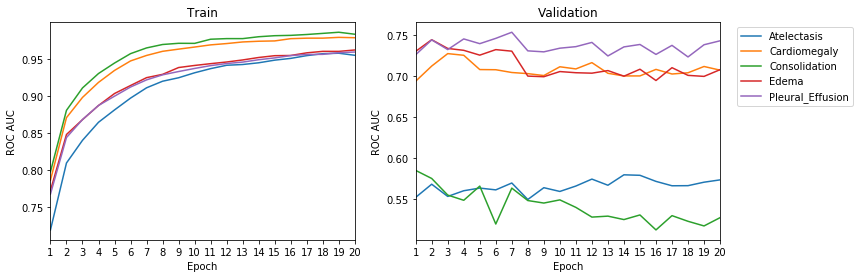


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


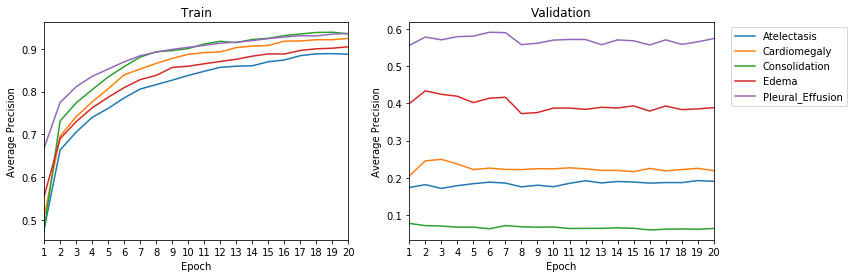

In [8]:
standardTraining.displayEpochProgression()